In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import random

In [2]:
torch.manual_seed(1)    # reproducible
np.random.seed(1)

In [54]:
ds = pd.read_csv('data.csv')
pure = ds.drop(columns=['milliseconds', 'as5048a'])
pure_np = pure.iloc[:,2:-1].values
pure_np[12013:,2]+=0.1
x = pure_np
x = x / np.linalg.norm(x)
y1 = [0]*12013+[1]*1000
x_train, x_test, y_train, y_test = train_test_split(x,y1)

In [22]:

BATCH_SIZE = 32
LR_G = 0.0001           # learning rate for generator
LR_D = 0.0001           # learning rate for discriminator
N_IDEAS = 15            # think of this as number of ideas for generating an art work (Generator)
ART_COMPONENTS = 27     # it could be total point G can draw in the canvas
PAINT_POINTS = np.vstack([np.linspace(-1, 1, ART_COMPONENTS) for _ in range(BATCH_SIZE)])

In [23]:
def artist_works():     # painting from the famous artist (real target)
    a = np.random.uniform(1, 2, size=BATCH_SIZE)[:, np.newaxis]
    paintings = a * np.power(PAINT_POINTS, 2) + (a-1)
    paintings = torch.from_numpy(paintings).float()
    return paintings

In [24]:
G = nn.Sequential(                      # Generator
    nn.Linear(N_IDEAS, 128),            # random ideas (could from normal distribution)
    nn.ReLU(),
    nn.Linear(128, ART_COMPONENTS),     # making a painting from these random ideas
)

D = nn.Sequential(                      # Discriminator
    nn.Linear(ART_COMPONENTS, 128),     # receive art work either from the famous artist or a newbie like G
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),                       # tell the probability that the art work is made by artist
)

In [25]:
opt_D = torch.optim.Adam(D.parameters(), lr=LR_D)
opt_G = torch.optim.Adam(G.parameters(), lr=LR_G)
plt.ion()   # something about continuous plottin

In [26]:
list_d = []
list_g = []
for step in range(500000):
    p = random.randint(1,900) 
    artist_paintings = torch.tensor(x[-1000+p:-968+p,:])
    G_ideas = torch.randn(BATCH_SIZE, N_IDEAS)    # random ideas
    G_paintings = G(G_ideas)                  # fake painting from G (random ideas)
    prob_artist0 = D(artist_paintings.float())          # D try to increase this prob
    #print(prob_artist0)
    prob_artist1 = D(G_paintings)               # D try to reduce this prob
    D_loss = - torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))
#     G_loss = torch.mean(torch.log(1. - prob_artist1))
    G_loss = torch.mean(torch.log(prob_artist1))
    opt_D.zero_grad()
    D_loss.backward(retain_graph=True)  
    opt_D.step()
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()
    if(step%1000==0):
        print(D_loss)
        list_d.append(float(D_loss.data))
        list_g.append(float(D_loss.data))
#     if step % 1 == 0:  # plotting
#         plt.cla()
#         plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
#         plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
#         plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
#         plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 13})
#         plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 13})
#         plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=10);plt.draw();plt.pause(0.01)
#     plt.ioff()
#     plt.show()

tensor(1.4154, grad_fn=<NegBackward>)
tensor(1.3501, grad_fn=<NegBackward>)
tensor(1.3534, grad_fn=<NegBackward>)
tensor(1.3685, grad_fn=<NegBackward>)
tensor(1.3692, grad_fn=<NegBackward>)
tensor(1.3728, grad_fn=<NegBackward>)
tensor(1.3750, grad_fn=<NegBackward>)
tensor(1.3781, grad_fn=<NegBackward>)
tensor(1.3817, grad_fn=<NegBackward>)
tensor(1.3845, grad_fn=<NegBackward>)
tensor(1.3850, grad_fn=<NegBackward>)
tensor(1.3848, grad_fn=<NegBackward>)
tensor(1.3844, grad_fn=<NegBackward>)
tensor(1.3847, grad_fn=<NegBackward>)
tensor(1.3832, grad_fn=<NegBackward>)
tensor(1.3838, grad_fn=<NegBackward>)
tensor(1.3831, grad_fn=<NegBackward>)
tensor(1.3819, grad_fn=<NegBackward>)
tensor(1.3803, grad_fn=<NegBackward>)
tensor(1.3773, grad_fn=<NegBackward>)
tensor(1.3786, grad_fn=<NegBackward>)
tensor(1.3731, grad_fn=<NegBackward>)
tensor(1.3632, grad_fn=<NegBackward>)
tensor(1.3681, grad_fn=<NegBackward>)
tensor(1.3618, grad_fn=<NegBackward>)
tensor(1.3523, grad_fn=<NegBackward>)
tensor(1.373

KeyboardInterrupt: 

In [29]:
mylist = list(range(188))

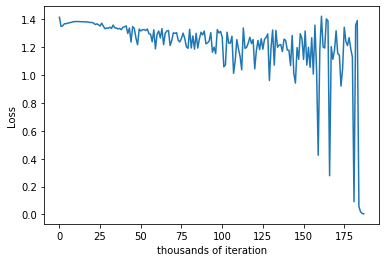

In [30]:
plt.plot(mylist, list_d)
plt.xlabel('thousands of iteration')
plt.ylabel('Loss')
plt.savefig('loss3.jpg')
plt.show()

In [93]:
plt.savefig('loss.jpg')

<Figure size 432x288 with 0 Axes>

In [39]:
    
G_ideas = torch.randn(BATCH_SIZE, N_IDEAS)    # random ideas
G_paintings = G(G_ideas) 

In [40]:
raw = np.array(G_paintings.data)

In [41]:
raw.shape

(32, 27)

In [42]:
for i in range(200):
    G_ideas = torch.randn(BATCH_SIZE, N_IDEAS)    # random ideas
    G_paintings = G(G_ideas)
    b = np.array(G_paintings.data)
    print(b.shape)
    print(raw.shape)
    raw = np.concatenate((raw,b))

(32, 27)
(32, 27)
(32, 27)
(64, 27)
(32, 27)
(96, 27)
(32, 27)
(128, 27)
(32, 27)
(160, 27)
(32, 27)
(192, 27)
(32, 27)
(224, 27)
(32, 27)
(256, 27)
(32, 27)
(288, 27)
(32, 27)
(320, 27)
(32, 27)
(352, 27)
(32, 27)
(384, 27)
(32, 27)
(416, 27)
(32, 27)
(448, 27)
(32, 27)
(480, 27)
(32, 27)
(512, 27)
(32, 27)
(544, 27)
(32, 27)
(576, 27)
(32, 27)
(608, 27)
(32, 27)
(640, 27)
(32, 27)
(672, 27)
(32, 27)
(704, 27)
(32, 27)
(736, 27)
(32, 27)
(768, 27)
(32, 27)
(800, 27)
(32, 27)
(832, 27)
(32, 27)
(864, 27)
(32, 27)
(896, 27)
(32, 27)
(928, 27)
(32, 27)
(960, 27)
(32, 27)
(992, 27)
(32, 27)
(1024, 27)
(32, 27)
(1056, 27)
(32, 27)
(1088, 27)
(32, 27)
(1120, 27)
(32, 27)
(1152, 27)
(32, 27)
(1184, 27)
(32, 27)
(1216, 27)
(32, 27)
(1248, 27)
(32, 27)
(1280, 27)
(32, 27)
(1312, 27)
(32, 27)
(1344, 27)
(32, 27)
(1376, 27)
(32, 27)
(1408, 27)
(32, 27)
(1440, 27)
(32, 27)
(1472, 27)
(32, 27)
(1504, 27)
(32, 27)
(1536, 27)
(32, 27)
(1568, 27)
(32, 27)
(1600, 27)
(32, 27)
(1632, 27)
(32, 27)
(1664

In [45]:
generated = raw

In [46]:
import pandas as pd
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np

In [47]:
x = np.concatenate((x,generated))

In [48]:
x.shape

(19445, 27)

In [49]:
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
X_2d = tsne.fit_transform(x)

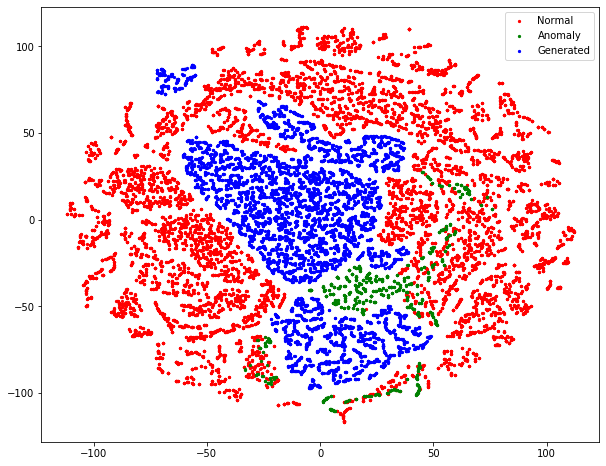

In [57]:
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:12013,0],X_2d[:12013,1],color='r',marker='o',s=5,label='Normal')
plt.scatter(X_2d[12013:13013,0],X_2d[12013:13013,1],color='g',s=5,label='Anomaly')
plt.scatter(X_2d[13013:,0],X_2d[13013:,1],color='b',s=5,label='Generated')


plt.legend()
plt.savefig('scat7.jpg')
plt.show()

In [62]:
y = [0]*12013+[1]*(19445-12013)

In [51]:
x_train, x_test1, y_train, y_test1 = train_test_split(x,y)
rng = np.random.RandomState(42)


In [82]:
from sklearn.neighbors import KNeighborsClassifier  
neigh = KNeighborsClassifier(n_neighbors=1)  
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9768364242248624
0.9740842019314442


In [58]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9891642333325903
0.9920204725430057


In [59]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
y_pred = clf.fit(x_train, y_train).predict(x_test)
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9329611818202082
0.7712091194957889


In [64]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(x_train)


In [65]:
y_pred = [0 if i < 0 else i for i in y_pred]
print(recall_score(y_train, y_pred, average='macro'))
print(f1_score(y_train, y_pred, average='macro'))

0.515222265689613
0.15154021697011127


In [66]:
from pyod.models.abod import ABOD

In [67]:
clf = ABOD()
clf.fit(x_train)
y_pred = clf.predict(x_test)
y_pred = 1-y_pred
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

D:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
D:\ANACONDA\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
D:\ANACONDA\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\ANACONDA\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
D:\ANACONDA\lib\site-packages\pyod\models\base.py:365: RuntimeWarning: invalid value encountered in greater
  self.labels_ = (self.decision_scores_ > self.threshold_).astype(
D:\ANACONDA\lib\site-packages\pyod\models\base.py:168: RuntimeWarning: invalid value encountered in greater
  return (pred_score > self.threshold_).astype('int').ravel()


0.5
0.06815578465063


In [68]:
from pyod.models.auto_encoder import AutoEncoder

Using TensorFlow backend.


In [69]:
clf = AutoEncoder(epochs=30, contamination=0.001, hidden_neurons=[33,16,16,33])
clf.fit(x_train)
y_pred = clf.predict(x_test)
y_pred = 1-y_pred
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 27)                756       
_________________________________________________________________
dropout_1 (Dropout)          (None, 27)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 27)                756       
_________________________________________________________________
dropout_2 (Dropout)          (None, 27)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 33)                924       
_________________________________________________________________
dropout_3 (Dropout)          (None, 33)                0         
________________________________________________

In [70]:
from pyod.models.cblof import CBLOF

clf = CBLOF(random_state=rng)
clf.fit(x_train)
y_pred = clf.predict(x_test)
y_pred = 1-y_pred
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.5263482714040523
0.16445753169438398


In [71]:
from pyod.models.ocsvm import OCSVM

clf = OCSVM()
clf.fit(x_train)
y_pred = clf.predict(x_test)
y_pred = 1-y_pred
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.5109792590776363
0.16103361834089233


In [72]:
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(x_train)
y_pred = clf.predict(x_test)
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))
print(matthews_corrcoef(y_test, y_pred))

D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3277310924369748
0.04776484996938151


NameError: name 'matthews_corrcoef' is not defined

In [83]:
np.savetxt('gan.txt', x)